# Step 1: Load the Data

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

We use data.head() to display the first few rows of the dataset. This helps us understand the structure of the data and the variables available for analysis.

In [ ]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
91,92,28.6,1.5,33.0,7.3
18,19,69.2,20.5,18.3,11.3
21,22,237.4,5.1,23.5,12.5
100,101,222.4,4.3,49.8,11.7
106,107,25.0,11.0,29.7,7.2


#  Step 2:  Exploring the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df[df.duplicated()]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [ ]:
df.shape

(200, 5)

# Step 3: Visualize the Data

1. This line of code creates a scatter plot with a linear regression line using Seaborn (sns) to visualize the relationship between the TV advertising budget (x) and sales (y) from the DataFrame df, while also specifying a figure size of 8x6 inches.

<Axes: xlabel='TV', ylabel='Sales'>

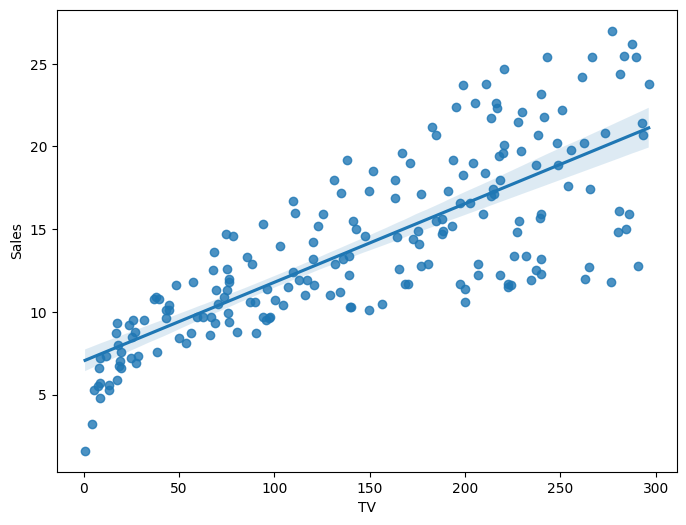

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='TV',y='Sales',data=df)

2. using Seaborn (sns) to visualize the relationship between newspaper advertising expenditures (x) and sales (y) from the DataFrame df, with a figure size of 8x6 inches.

<Axes: xlabel='Newspaper', ylabel='Sales'>

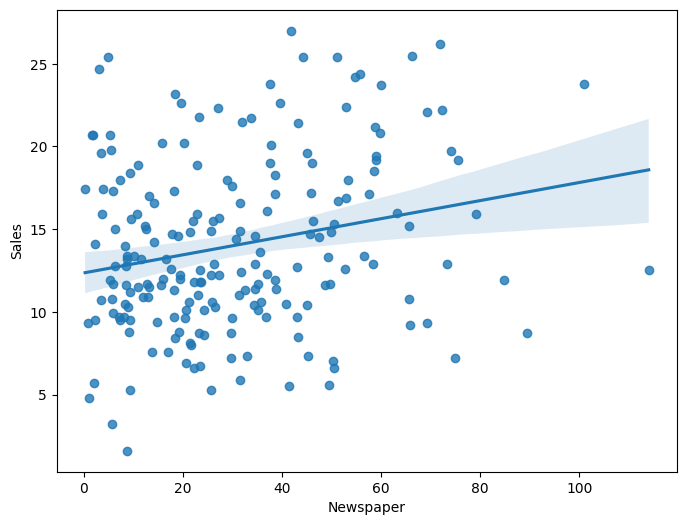

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Newspaper',y='Sales',data=df)

3. This line of code generates a scatter plot with a linear regression line using Seaborn (sns) to display the correlation between radio advertising expenses (x) and sales (y) from the DataFrame df, with the figure size set to 8x6 inches.

<Axes: xlabel='Radio', ylabel='Sales'>

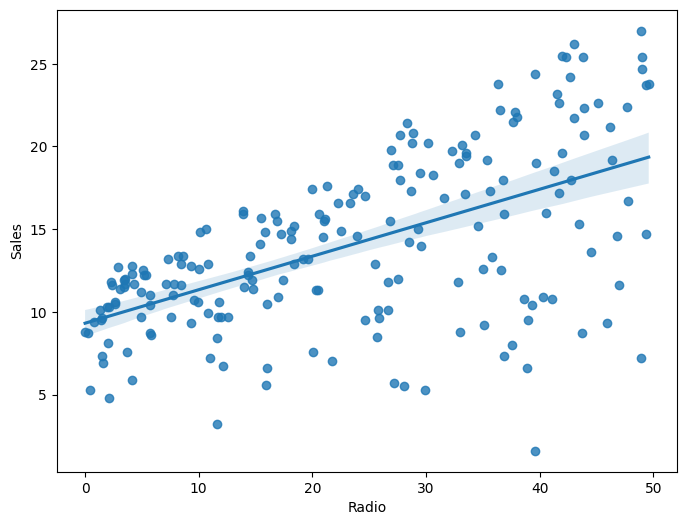

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Radio',y='Sales',data=df)

4. This code produces a pairplot using Seaborn (sns) to visualize relationships between all pairs of variables in the DataFrame df, showing scatter plots for variable pairs and histograms along the diagonal.

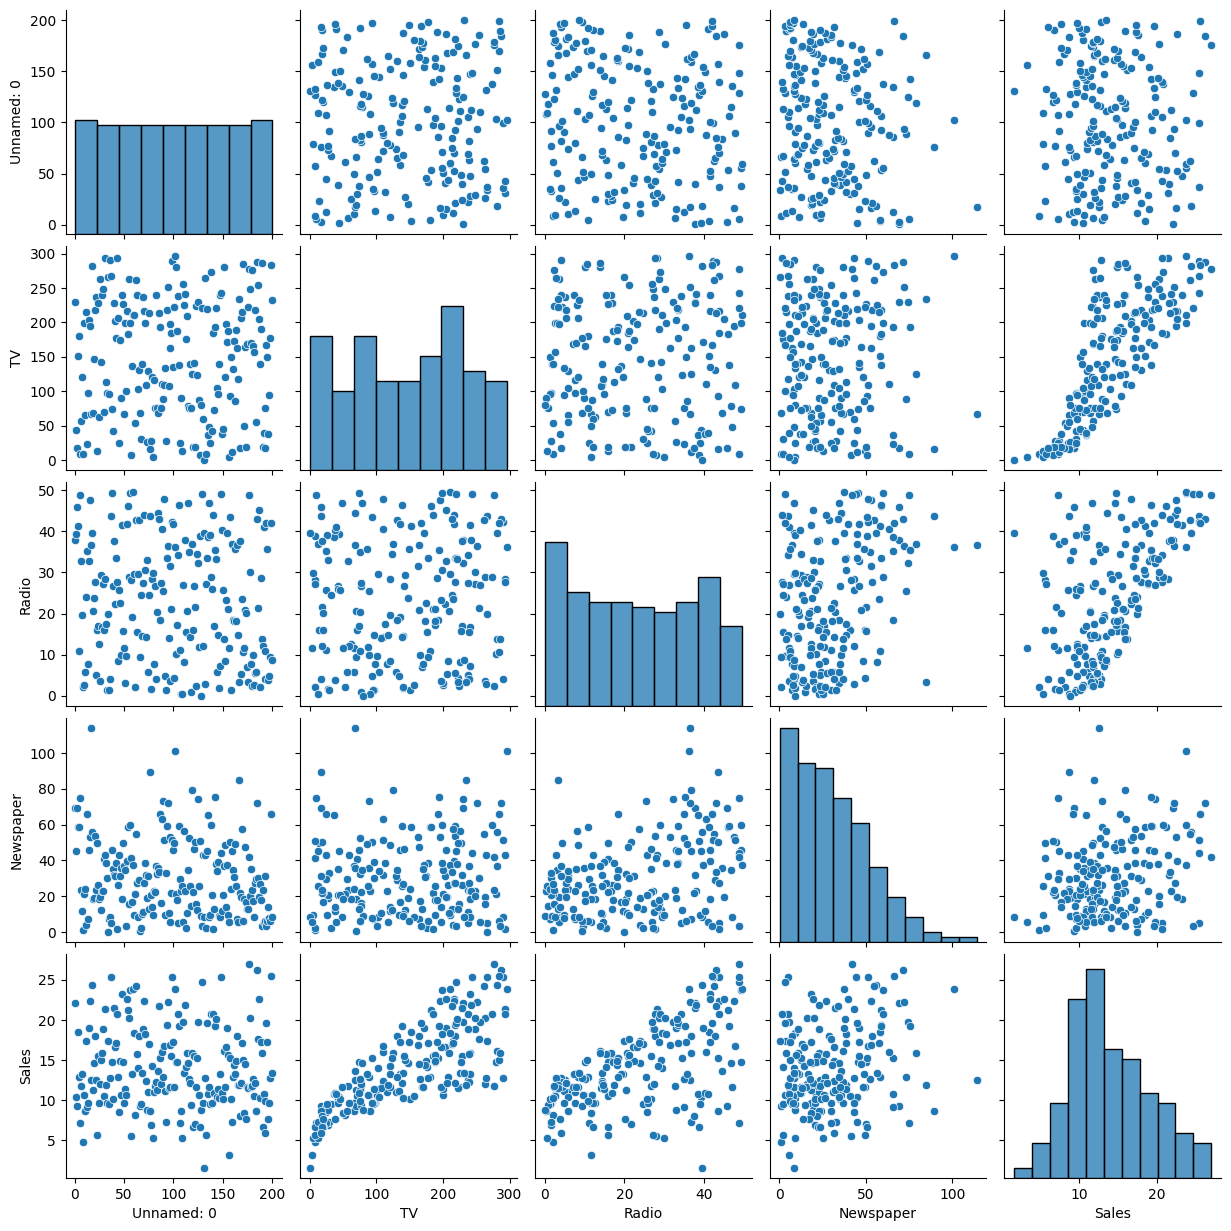

In [ ]:
sns.pairplot(df)

5. This line of code creates a pairplot using Seaborn (sns) to visualize relationships between all pairs of variables in the DataFrame df, while coloring the plots based on the 'Sales' variable.

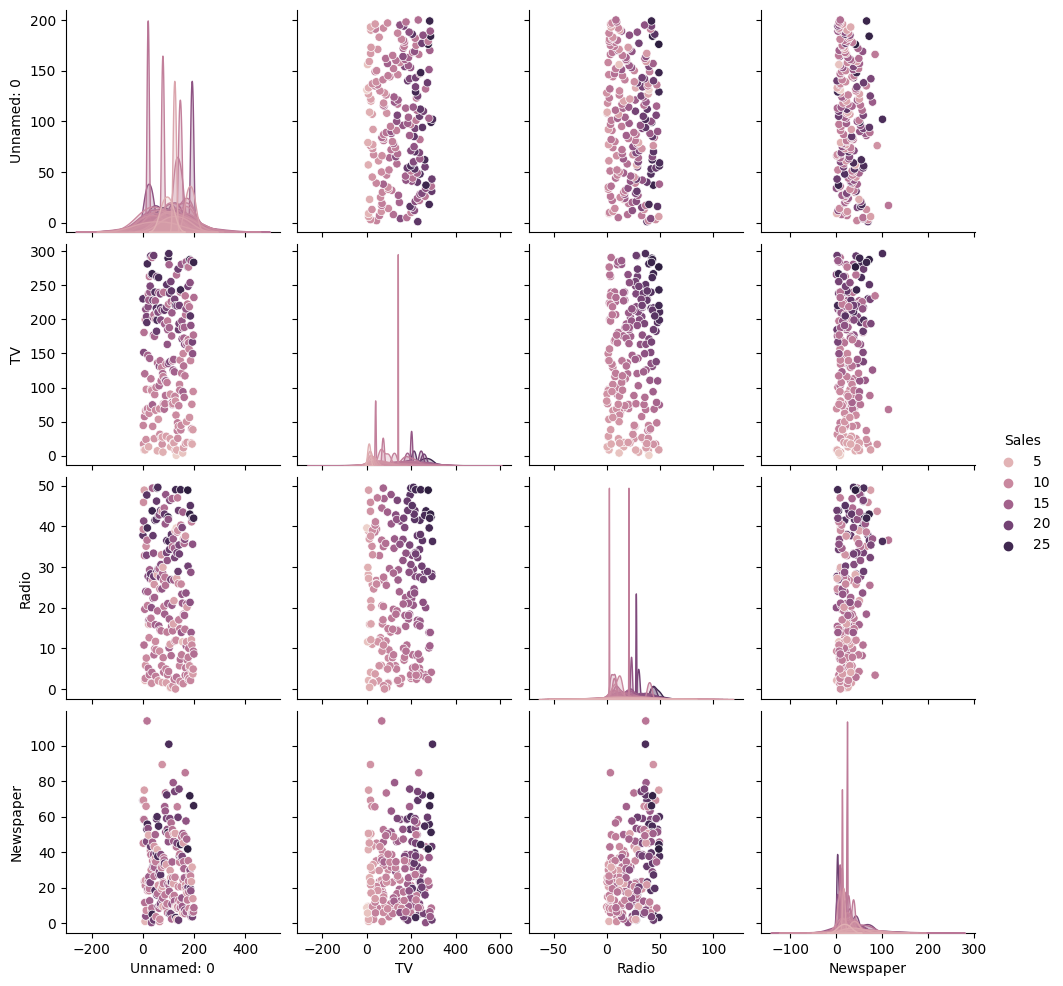

In [ ]:
sns.pairplot(data = df , hue = 'Sales')

6. This code utilizes Seaborn (sns) to generate a histogram plot of the 'Sales' variable from the DataFrame df, with 30 bins and kernel density estimation (KDE) enabled.

<Axes: xlabel='Sales', ylabel='Count'>

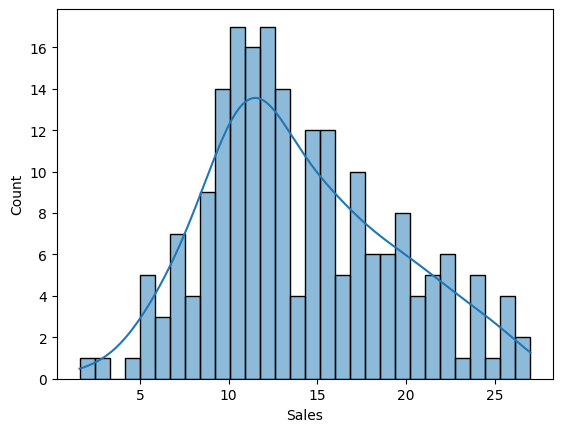

In [ ]:
sns.histplot(df['Sales'],bins=30, kde=True)

7. This code computes the correlation matrix (cor_mat) for the variables 'TV', 'Radio', 'Newspaper', and 'Sales' from the DataFrame df, and then creates a heatmap using Seaborn (sns) to visualize the correlations between these variables, including annotations for correlation

<Axes: >

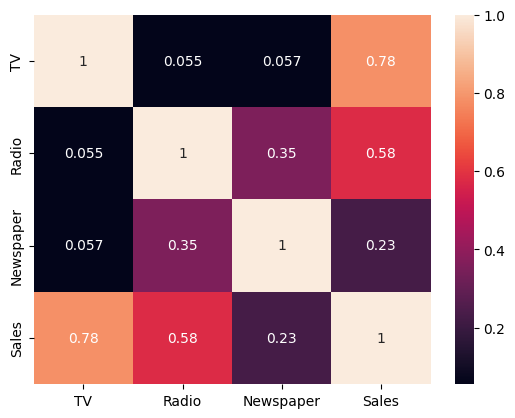

In [ ]:
cor_mat = df[["TV", "Radio", "Newspaper", "Sales"]].corr()
sns.heatmap(cor_mat, annot=True)

8. This code generates a horizontal boxplot using Seaborn (sns) to visualize the distribution of data across different variables in the DataFrame df.

(Finding Outliers)

<Axes: >

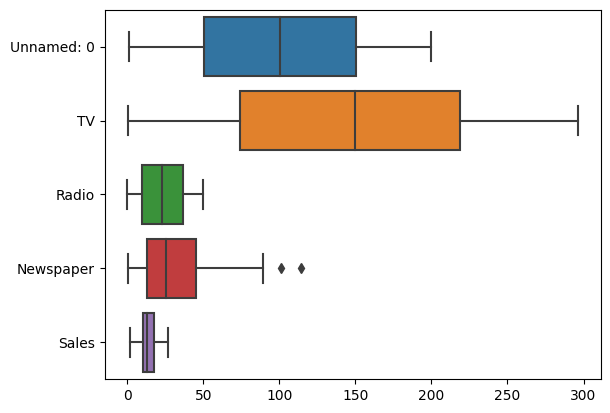

In [ ]:
sns.boxplot(data=df,orient='h')

9. This code produces a horizontal boxplot using Seaborn (sns) to display the distribution of data from the 'Newspaper' variable in the DataFrame df

<Axes: >

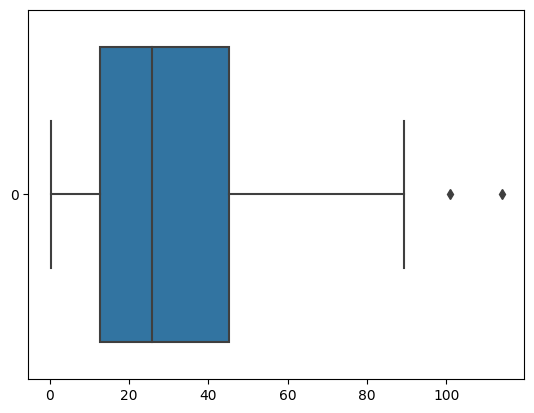

In [ ]:
sns.boxplot(data=df['Newspaper'],orient='h')

# Step 4: Removing Outliers Using IQR

Outlier detection: ensuring data integrity.

Data refinement: eliminating anomalies for accuracy.


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [ ]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [ ]:
df1 = df[(df >= lower_bound) & (df <= upper_bound) | df.isnull()]

In [ ]:
df1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


checking missing values

In [ ]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     2
Sales         0
dtype: int64

fill the null values with it's mean

In [ ]:
df1['Newspaper'] = df1['Newspaper'].fillna(df1['Newspaper'].mean())

In [ ]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

This code computes descriptive statistics for each numerical column in the DataFrame df1 and then transposes the result using .T to display the statistics for each column as rows.

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.500000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.042500,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.264000,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,29.777273,20.343298,0.3,12.750,25.75,43.550,89.4
Sales,200.0,14.022500,5.217457,1.6,10.375,12.90,17.400,27.0


<Axes: >

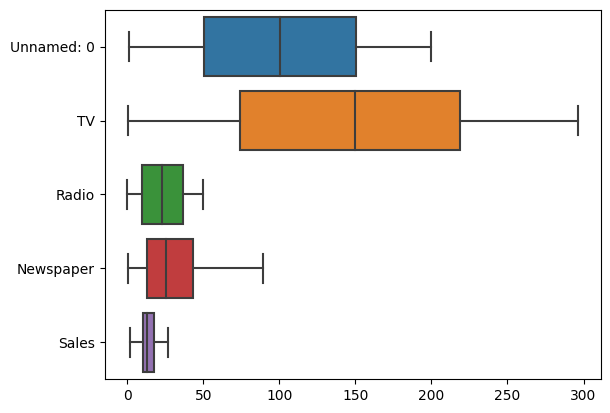

In [ ]:
sns.boxplot(data=df1,orient='h')

Scatter plots to check the linearity assumption between each independent variable and dependent variables

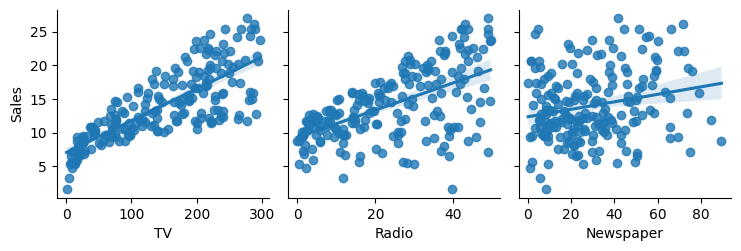

In [ ]:
sns.pairplot(df1, x_vars=["TV","Radio","Newspaper"], y_vars=["Sales"], kind="reg")

Histograms to check the normality assumption of the dependent variable (Sales)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

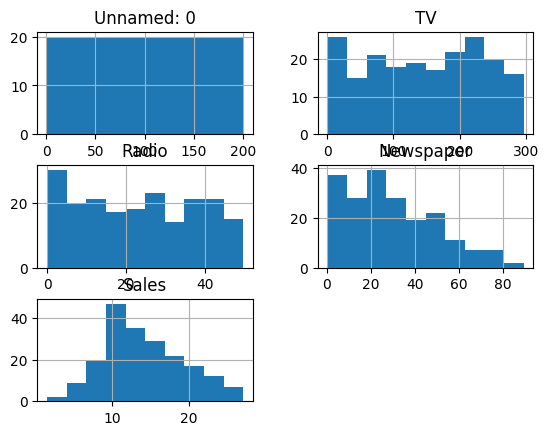

In [ ]:
df1.hist(bins=10)

# Step 5: Prepare the Data for Modeling.

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop('Sales', axis=1)
Y = df1[["Sales"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=46)


# Step 6: Linear regression model

In [ ]:
import statsmodels.api as sm

# Fit the linear regression model using OLS
linear_model = sm.OLS.from_formula(formula="Sales ~ TV + Radio + Newspaper", data=df1).fit()



Print the coeffiecints of the linear model

In [ ]:
## Print the coeffiecints of the linear model

print(linear_model.params, "\n")

Intercept    2.942325
TV           0.045763
Radio        0.188556
Newspaper   -0.001194
dtype: float64 



Print the summary of the linear regression model

In [ ]:
## Print the summary of the linear regression model

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.57e-96
Time:                        12:49:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9423      0.315      9.326      0.0